<a href="https://colab.research.google.com/github/MyCode-prem/NGDB-Project/blob/main/Fl_With_3_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Federated Learning With 3 Models**

1. Linear Regression
2. Lasso Regression
3. KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
df = pd.read_csv('/content/fl.csv')

In [ ]:
df.head()

,Distance_to_City_Center,Area(sqft),Bedrooms,Target
0,5.2,1750,3,345000
1,8.6,2100,4,430000
2,2.1,1500,2,280000
3,12.3,3000,5,600000
4,6.8,2400,4,500000


In [ ]:
df.isnull().sum()

Distance_to_City_Center    0
 Area(sqft)                0
 Bedrooms                  0
 Target                    0
dtype: int64

Data Visualization

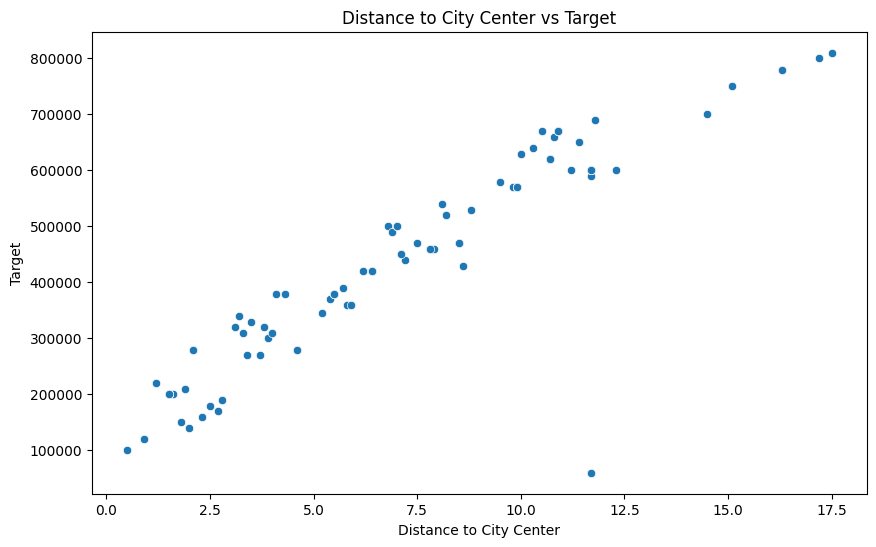

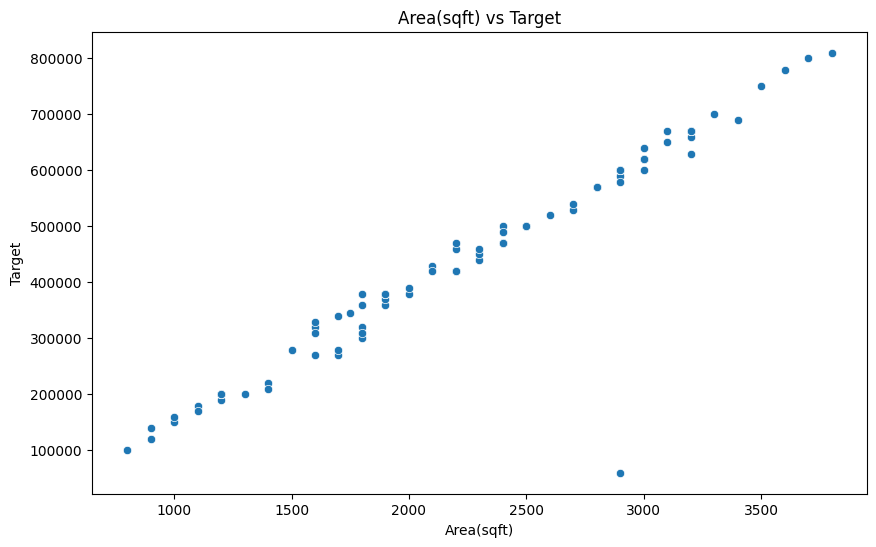

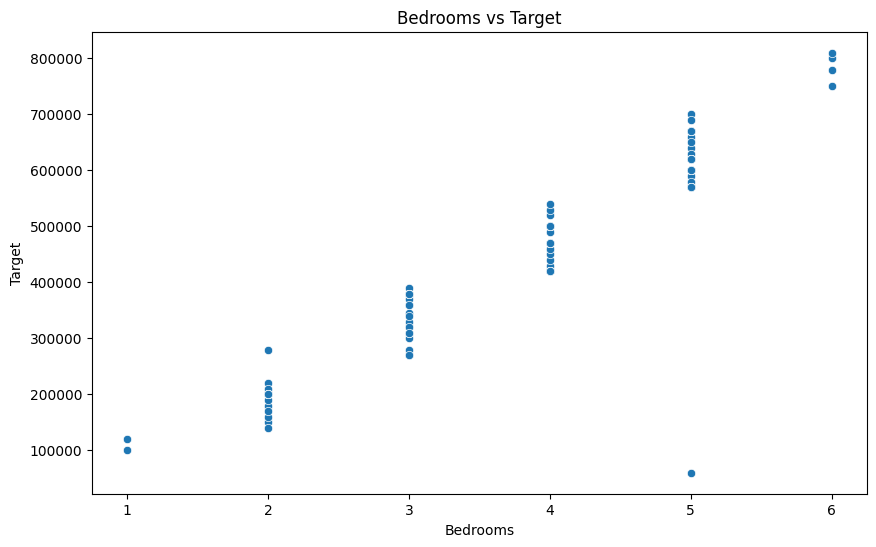

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a pandas DataFrame called 'df'
# 'Distance_to_City_Center', 'Area(sqft)', 'Bedrooms', and 'Target' are column names in your DataFrame

# Scatter plot for Distance_to_City_Center vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_to_City_Center', y=' Target', data=df)
plt.title('Distance to City Center vs Target')
plt.xlabel('Distance to City Center')
plt.ylabel('Target')
plt.show()

# Scatter plot for Area(sqft) vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Area(sqft)', y=' Target', data=df)
plt.title('Area(sqft) vs Target')
plt.xlabel('Area(sqft)')
plt.ylabel('Target')
plt.show()

# Scatter plot for Bedrooms vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Bedrooms', y=' Target', data=df)
plt.title('Bedrooms vs Target')
plt.xlabel('Bedrooms')
plt.ylabel('Target')
plt.show()


Spliting the dataset

In [ ]:
total_rows = len(df)
part_size = total_rows // 3

# Split the DataFrame into three parts
part1 = df.iloc[:part_size]
part2 = df.iloc[part_size:2*part_size]
part3 = df.iloc[2*part_size:]

# Write each part to separate CSV files
part1.to_csv('part1.csv', index=False)
part2.to_csv('part2.csv', index=False)
part3.to_csv('part3.csv', index=False)

In [ ]:
df1=pd.read_csv('part1.csv')
df2=pd.read_csv('part2.csv')
df3=pd.read_csv('part3.csv')

In [ ]:
xc1 = df1.iloc[:,0:3]
yc1 = df1.iloc[:,3:4]

In [ ]:
xtrc1,xtstc1,ytrc1,ytstc1 = train_test_split(xc1,yc1,train_size = .8)

Client-1

First Model -> Linear Regression

In [ ]:
from sklearn import linear_model as lm
m = lm.LinearRegression()
m.fit(xtrc1,ytrc1)

LinearRegression()

In [ ]:
y_predc1 = m.predict(xtstc1)

In [ ]:
y_predc1

array([[386556.21799268],
       [ 99437.49797581],
       [303391.38710386],
       [324001.38756011],
       [608583.20585369],
       [180019.2105978 ],
       [138376.3927314 ]])

In [ ]:
ytstc1

,Target
6,380000
22,100000
11,320000
17,270000
25,590000
13,180000
30,140000


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mpe
mpe(ytstc1,y_predc1)

0.045426594184401245

In [ ]:
parc1 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
parametersc1 = m.predict(parc1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
m.coef_

array([[ -604.02421983,   209.72414988, 18872.51609719]])

In [ ]:
for i in range(1,4):
  parametersc1[i] = parametersc1[i]-parametersc1[0]

In [ ]:
parametersc1

array([[-86912.3259167 ],
       [  -604.02421983],
       [   209.72414988],
       [ 18872.51609719]])

In [ ]:
m.intercept_

array([-86912.3259167])

Second Model -> Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc1, yc1, test_size=0.2, random_state=42)

# Creating a Lasso regression model
alpha = 0.1  # Regularization strength, higher values specify stronger regularization
model = Lasso(alpha=alpha)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error:", mse)


mean_absolute_percentage_error: 0.05912197764720311


In [ ]:
model.coef_

array([-1228.8286666 ,   203.11230165, 23536.23152823])

In [ ]:
model.intercept_

array([-86891.68108826])

In [ ]:
parc1 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
parametersc13 = model.predict(parc1)

for i in range(1,4):
  parametersc13[i] = parametersc13[i]-parametersc13[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
parametersc13

array([-86891.68108826,  -1228.8286666 ,    203.11230165,  23536.23152823])

Third Model -KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc1, yc1, test_size=0.2, random_state=42)

# Creating a KNN regression model
n_neighbors = 5  # Number of neighbors to use
model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error:", mae)


mean_absolute_percentage_error: 0.07908953864946788


Client 2

In [ ]:
xc2 = df2.iloc[:,0:3]
yc2 = df2.iloc[:,3:4]

First Model - Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc2, yc2, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 8367.46668327451


In [ ]:
parc1 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
parametersc2 = model.predict(parc1)

for i in range(1,4):
  parametersc2[i] = parametersc2[i]-parametersc2[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
parametersc2

array([[-56680.42862951],
       [  8216.81390866],
       [   173.00306041],
       [ 14095.15671961]])

In [ ]:
model.coef_

array([[ 8216.81390866,   173.00306041, 14095.15671961]])

In [ ]:
model.intercept_

array([-56680.42862951])

second Model - Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc2, yc2, test_size=0.2, random_state=42)

# Creating a Lasso regression model
alpha = 0.1  # Regularization strength, higher values specify stronger regularization
model = Lasso(alpha=alpha)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 80031703.79982533


In [ ]:
model.coef_

array([ 8216.84904398,   173.00540608, 14093.56399715])

In [ ]:
model.intercept_

array([-56679.98849556])

In [ ]:
parc1 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
parametersc23 = model.predict(parc1)

for i in range(1,4):
  parametersc23[i] = parametersc23[i]-parametersc23[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
parametersc23

array([-56679.98849556,   8216.84904398,    173.00540608,  14093.56399715])

Third Model - KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc2, yc2, test_size=0.2, random_state=42)

# Creating a KNN regression model
n_neighbors = 5  # Number of neighbors to use
model2 = KNeighborsRegressor(n_neighbors=n_neighbors)

# Training the model
model2.fit(X_train, y_train)

# Making predictions
y_pred = model2.predict(X_test)

# Evaluating the model
mae = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error", mae)


mean_absolute_percentage_error 0.06153293275368824


Client-3

In [ ]:
xc3 = df3.iloc[:,0:3]
yc3 = df3.iloc[:,3:4]

First Model - Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc3, yc3, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 68865.11077756788


In [ ]:
parc1 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
parametersc3 = model.predict(parc1)

for i in range(1,4):
  parametersc3[i] = parametersc3[i]-parametersc3[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
parametersc3

array([[-319284.75538721],
       [ -60484.74362896],
       [    485.05227939],
       [  18343.55169237]])

In [ ]:
model.coef_

array([[-60484.74362896,    485.05227939,  18343.55169237]])

In [ ]:
model.intercept_

array([-319284.75538721])

Second model - Lasso regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc3, yc3, test_size=0.2, random_state=42)

# Creating a Lasso regression model
alpha = 0.1  # Regularization strength, higher values specify stronger regularization
model = Lasso(alpha=alpha)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6453885653.479516


In [ ]:
model.coef_

array([-60484.15335525,    485.0540036 ,  18340.63838076])

In [ ]:
model.intercept_

array([-319281.58947383])

In [ ]:
parc1 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
parametersc33 = model.predict(parc1)

for i in range(1,4):
  parametersc33[i] = parametersc33[i]-parametersc33[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
parametersc33

array([-319281.58947383,  -60484.15335525,     485.0540036 ,
         18340.63838076])

Third model - KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have your dataset loaded into X and y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xc2, yc2, test_size=0.2, random_state=42)

# Creating a KNN regression model
n_neighbors = 5  # Number of neighbors to use
model3 = KNeighborsRegressor(n_neighbors=n_neighbors)

# Training the model
model3.fit(X_train, y_train)

# Making predictions
y_pred = model3.predict(X_test)

# Evaluating the model
mae = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error", mae)


mean_absolute_percentage_error 0.06153293275368824


Aggregation Server

Aggregation Server for KNN

In [ ]:
y_p1=model.predict(xc1)
y_p1

array([270067.23452014, 252530.65275285, 317963.97064079, 483628.52695867,
       506918.32987212, 208738.26157412, 445766.47343971, 372949.33406193,
       575140.53774444, 545134.6164183 , 537828.10962691, 324325.85602625,
        81171.91412668,  99748.70785893, 343374.96046147, 519251.31589466,
       641005.40335806, 336540.76437304,  93582.21484766, 496079.59065695,
       551064.95407809, 306534.8430469 ,  56860.17510884, 434219.26817008,
       531466.22424145, 471413.61861188, 360852.50339088, 575494.77077167,
       300132.19468415,  63340.13817004,  32979.98381667,  87651.87718788,
       604596.83366916])

In [ ]:
y_p1 = model.predict(xc1);
y_p2 = model2.predict(xc1);
y_p3 = model3.predict(xc1);
y_predict_final = [];
for i in range(0,len(y_p1)):
  temp=y_p1[i]+y_p2[i]+y_p3[i];
  temp = temp/3;
  y_predict_final.append(temp);

In [ ]:
y_predict_final

[array([311355.74484005]),
 array([370843.55091762]),
 array([285987.9902136]),
 array([575876.17565289]),
 array([479639.44329071]),
 array([229579.42052471]),
 array([397922.15781324]),
 array([345649.77802064]),
 array([613046.84591481]),
 array([603044.87213943]),
 array([577942.70320897]),
 array([309441.95200875]),
 array([187057.30470889]),
 array([193249.56928631]),
 array([411791.65348716]),
 array([499750.43863155]),
 array([632335.13445269]),
 array([313513.58812435]),
 array([191194.07161589]),
 array([586693.19688565]),
 array([605021.65135936]),
 array([343511.61434897]),
 array([178953.39170295]),
 array([451406.42272336]),
 array([535822.07474715]),
 array([555804.53953729]),
 array([341617.50113029]),
 array([613164.92359056]),
 array([301377.39822805]),
 array([181113.37939001]),
 array([170993.32793889]),
 array([189217.29239596]),
 array([612198.94455639])]

In [ ]:
mean_absolute_percentage_error(y_predict_final,yc1)

0.13083197865295623

Aggregation Server for linear regression

In [ ]:
aggregatedParameters = [];
t1 = parametersc1[0][0]+parametersc2[0][0]+parametersc3[0][0];
t1 = t1/3;
aggregatedParameters.append(t1);
t1 = parametersc1[1][0]+parametersc2[1][0]+parametersc3[1][0];
t1 = t1/3;
aggregatedParameters.append(t1);
t1 = parametersc1[2][0]+parametersc2[2][0]+parametersc3[2][0];
t1 = t1/3;
aggregatedParameters.append(t1);
t1 = parametersc1[3][0]+parametersc2[3][0]+parametersc3[3][0];
t1 = t1/3;
aggregatedParameters.append(t1);
print(aggregatedParameters)


[-154292.50331113863, -17623.984646710527, 289.2598298963688, 17103.74150305551]


In [ ]:
def aggregatedModel(x):
  finalOutput = [];
  for i in range(0,len(x)):
    temp = [];
    t = aggregatedParameters[0]+aggregatedParameters[1]*x[i][0]+aggregatedParameters[2]*x[i][1]+aggregatedParameters[3]*x[i][2];
    temp.append(t);
    finalOutput.append(temp);
  return finalOutput;

In [ ]:
y_a_pred = aggregatedModel(xc1.values);
mean_absolute_percentage_error(y_a_pred,yc1)

0.09274003047236017

Aggregation Server for Lasso Regression

In [ ]:
aggregatedParameters = [];
t1 = parametersc13[0]+parametersc23[0]+parametersc33[0];
t1 = t1/3;
aggregatedParameters.append(t1);
t1 = parametersc13[1]+parametersc23[1]+parametersc33[1];
t1 = t1/3;
aggregatedParameters.append(t1);
t1 = parametersc13[2]+parametersc23[2]+parametersc33[2];
t1 = t1/3;
aggregatedParameters.append(t1);
t1 = parametersc13[3]+parametersc23[3]+parametersc33[3];
t1 = t1/3;
aggregatedParameters.append(t1);
print(aggregatedParameters)


[-154284.41968588412, -17832.044325955205, 287.05723711200943, 18656.811302047518]


In [ ]:
def aggregatedModel(x):
  finalOutput = [];
  for i in range(0,len(x)):
    temp = [];
    t = aggregatedParameters[0]+aggregatedParameters[1]*x[i][0]+aggregatedParameters[2]*x[i][1]+aggregatedParameters[3]*x[i][2];
    temp.append(t);
    finalOutput.append(temp);
  return finalOutput;

In [ ]:
y_a_pred = aggregatedModel(xc1.values);
mean_absolute_percentage_error(y_a_pred,yc1)

0.09322458350250001